In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style='whitegrid')


In [3]:
from google.colab import files
uploaded = files.upload()


Saving titanic.zip to titanic (1).zip


In [4]:
import zipfile
import os

# Replace 'titanic.zip' with the actual filename if different
with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")  # This creates a folder named titanic_data


In [5]:
os.listdir("titanic_data")


['test.csv', 'gender_submission.csv', 'train.csv']

In [6]:
import pandas as pd

# Adjust the filename accordingly
df = pd.read_csv("titanic_data/train.csv")  # or titanic_data/titanic.csv
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Text(0.5, 1.0, 'Survival Count')

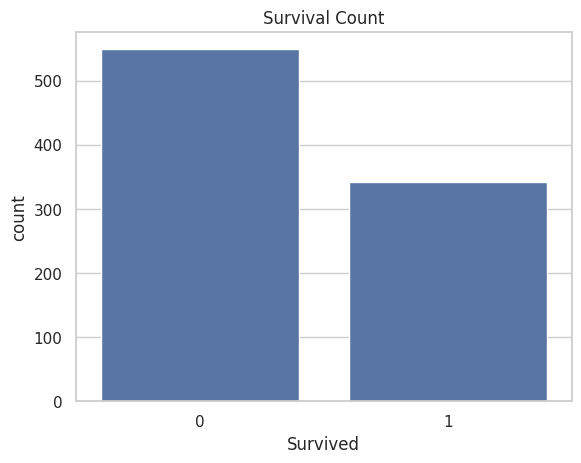

In [8]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')


<Axes: xlabel='Sex', ylabel='count'>

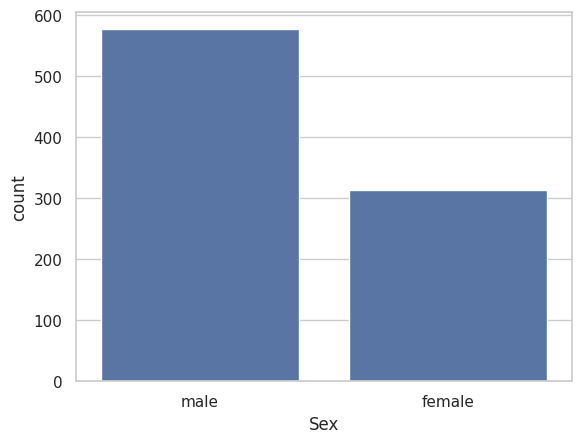

In [9]:
sns.countplot(x='Sex', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

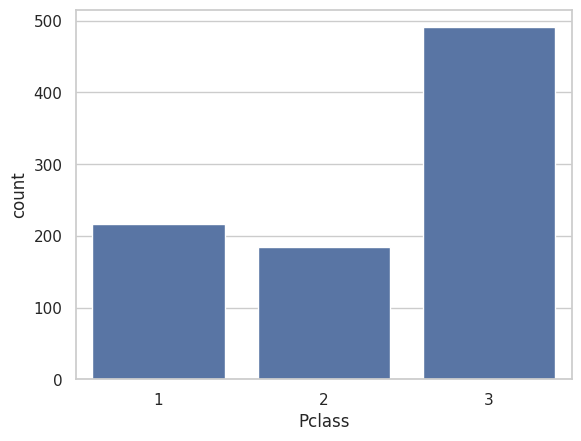

In [10]:
sns.countplot(x='Pclass', data=df)


Text(0.5, 1.0, 'Age Distribution')

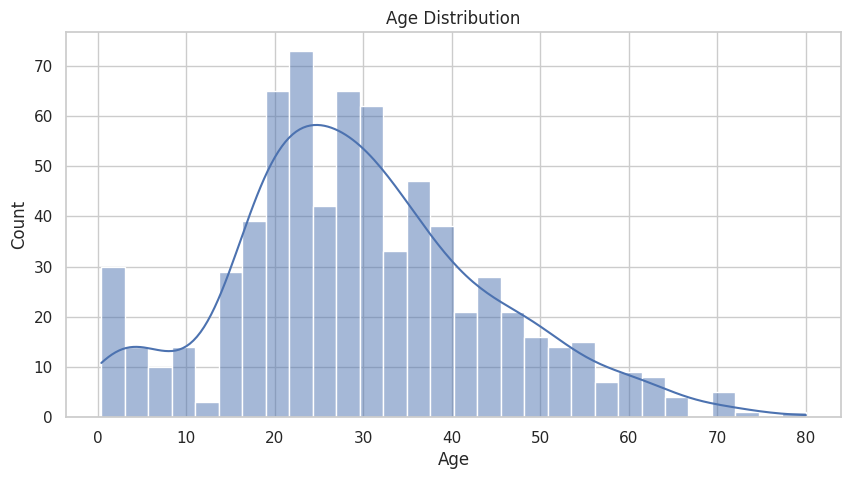

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')


<Axes: xlabel='Sex', ylabel='count'>

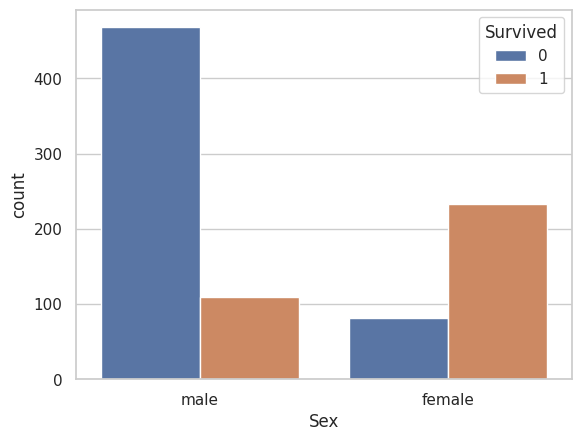

In [12]:
sns.countplot(x='Sex', hue='Survived', data=df)


<Axes: xlabel='Pclass', ylabel='count'>

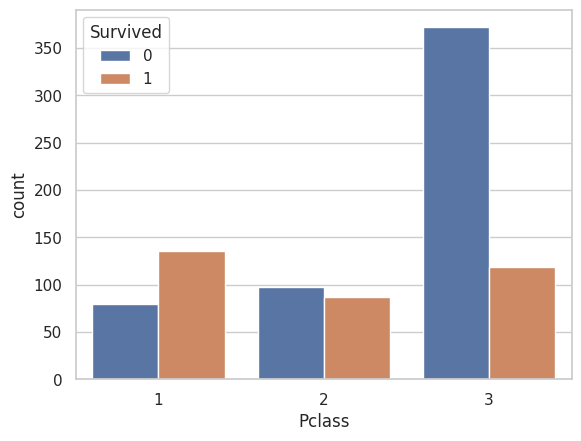

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)


<Axes: xlabel='Survived', ylabel='Age'>

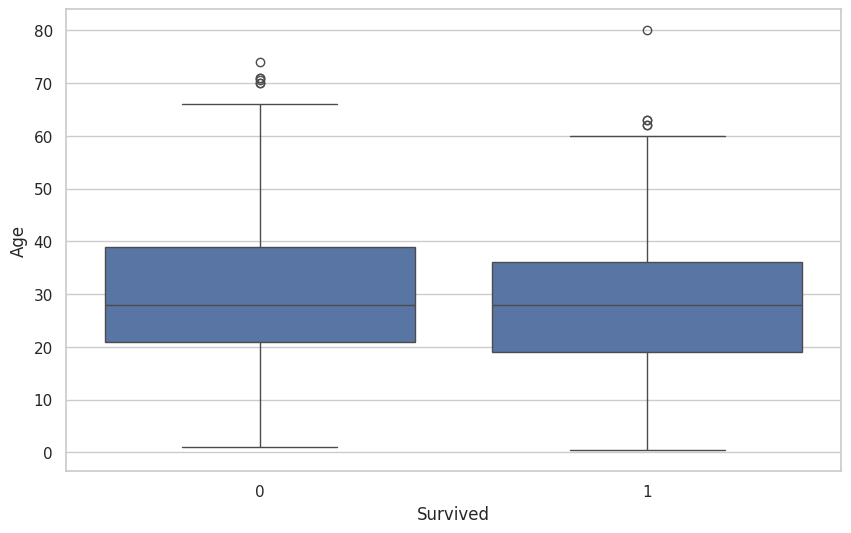

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=df)


<Axes: xlabel='Survived', ylabel='Fare'>

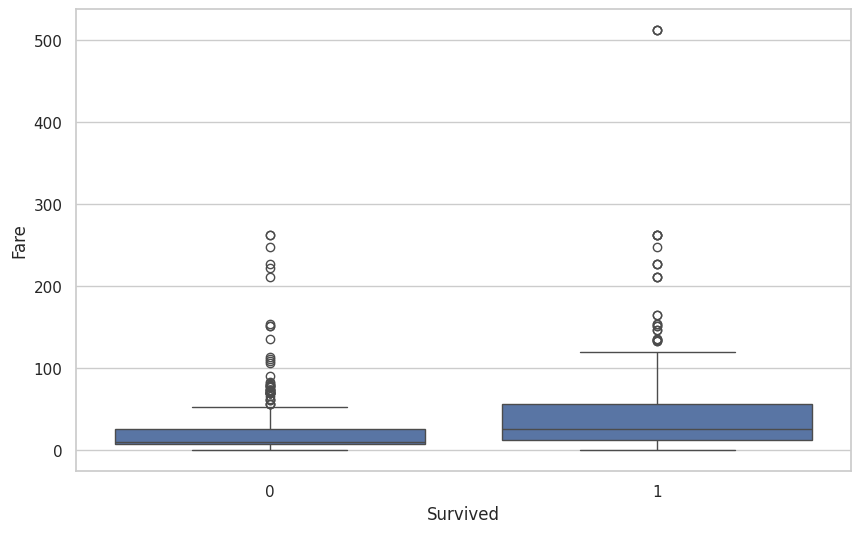

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)


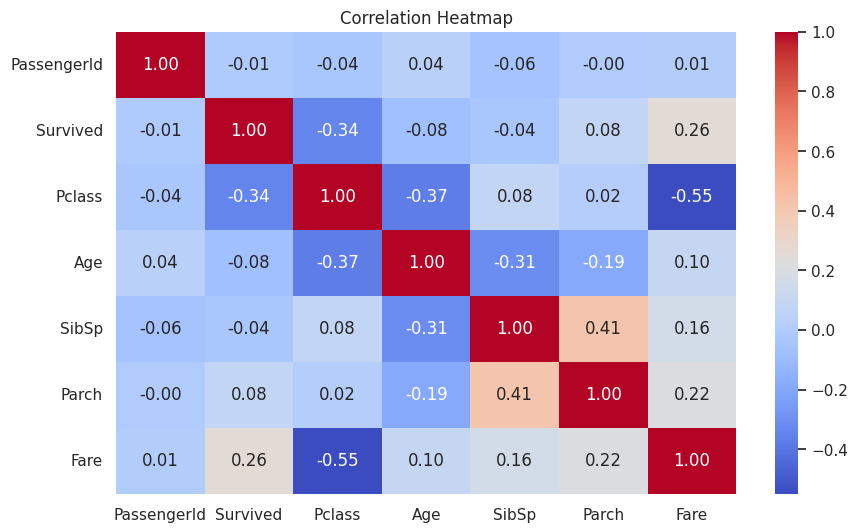

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


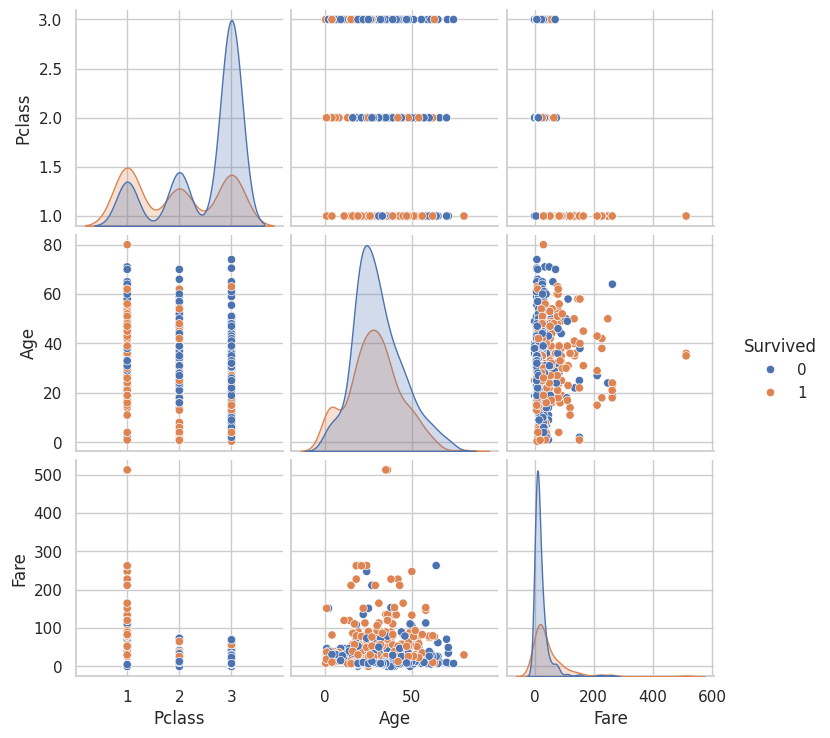

In [18]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')


In [19]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns='Cabin', inplace=True)
